In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

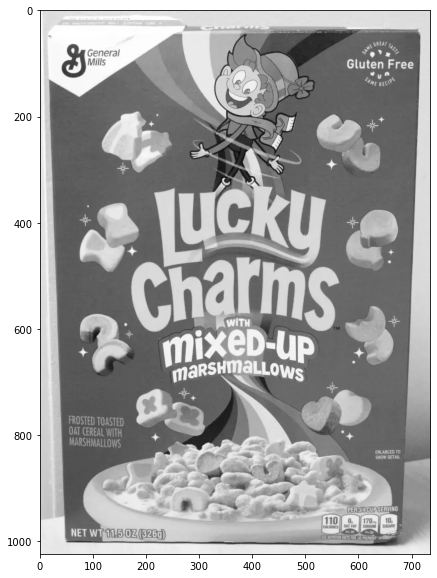

In [22]:
myCereal = cv2.imread('../DATA/myCereal.webp', 0)
manyCereals = cv2.imread('../DATA/many_cereals.jpg', 0)

def display(img, cmap = 'gray'):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)
    
display(myCereal)

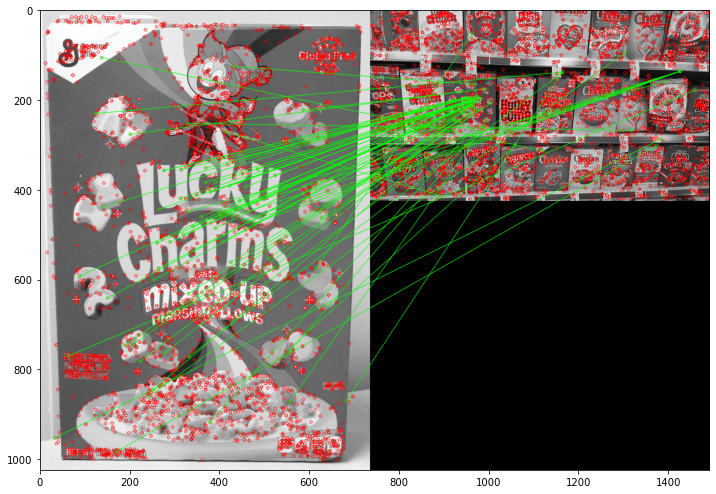

In [20]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(myCereal.astype(np.uint8), None)
kp2, des2 = sift.detectAndCompute(manyCereals.astype(np.uint8), None)

FLANN_INDEX_KDTREE = 0

index_params = {
    'algorithm' : FLANN_INDEX_KDTREE, 
    'trees' : 5,
}

search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1, 0]
        
draw_params = dict(matchColor = (0, 255, 0),
                  singlePointColor = (255, 0, 0),
                  matchesMask = matchesMask,
                  flags = 0)
        
flann_matches = cv2.drawMatchesKnn(myCereal, kp1, manyCereals, kp2, matches, None, **draw_params)

display(flann_matches)